<img src="https://github.com/insaid2018/Term-1/blob/master/Images/INSAID_Full%20Logo.png?raw=true" width="240" height="360" />

# LINEAR REGRESSION

## Table of Content

1. [Problem Statement](#section1)<br>
2. [Data Loading and Description](#section2)<br>
3. [Installing & Importing Libraries](#Section3)<br>
    - 3.1 [Importing Libarary](#Section31)
4. [Data Pre-processing](#section4)<br>
    - 4.1 [Pre-Profiling Report](#Section41)
5. [Exploratory Data Analysis](#section5)<br>
6. [Training and testing the Model](#section6)<br>
    - 6.1 [Splitting data into training and test datasets](#section61)<br>
    - 6.2 [Linear regression in scikit-learn](#section62)<br>
    - 6.3 [Interpreting Model Coefficients](#section63)<br>
    - 6.4 [Using the Model for Prediction](#section64)<br>
    
7. [Model evaluation](#section7)<br>
    
8. [Prediction on Test Data](#section8)<br>


<a name = Section1></a>
---
## 1. Problem Statement

---

The more fuel your vehicle burns, the more greenhouse gases it produces, mostly in the form of carbon dioxide, or CO2. For every litre of gasoline your vehicle uses, it generates about 2.3 kilograms of CO2. Although not directly harmful to our health, CO2 emissions contribute to climate change.
   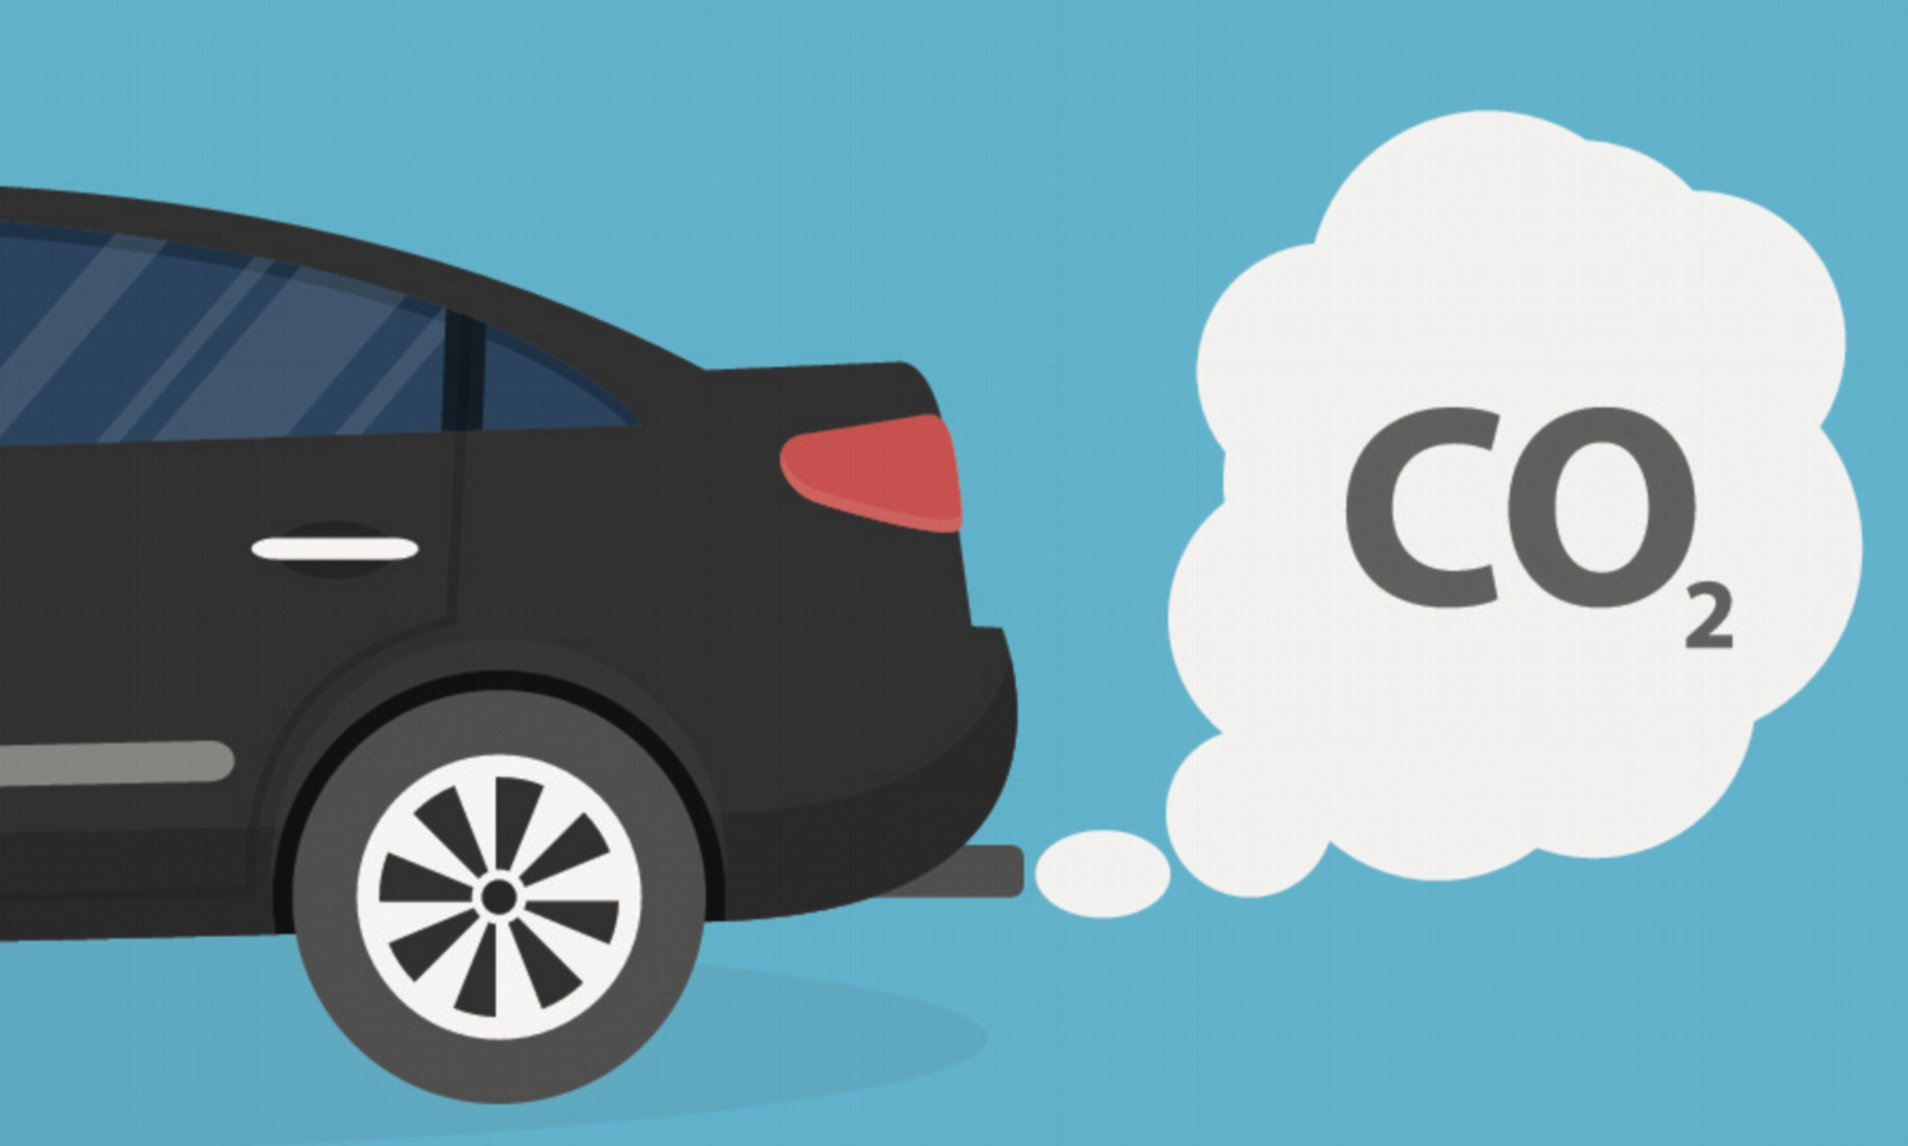
- The current process is a manual method of calculating GHG emissions based on an inspection by experts

- This is very tedious and time-consuming as it needs to be repeated every time a new car is launched.

- The company plans to modernize its legacy systems and wants to implement an automated way of predicting the medical expenses of its insurers based on various factors.

The organization has hired a data science consultant. They want to automate the process of calculating the emission of CO2(Greenhouse Gas) from vehicles.

<a name = Section2></a>
---
# 2. Data Loading and Description
---



dataset collected from vehicle manufacturers consisting of records of previously launched vehicles, their fuel consumption, model specification and emissions of carbon dioxide.
<br>


    
                

| Id | Features | Description |
| :-- | :--| :--| 
|01| **Make** | Company of the vehicle |
|02| **Model** | Car Model | 
|03|**Vehicle Class** |Class of vehicle depending on their utility, capacity and weight|
|04|**Engine Size(L)** |Size of engine used in Litre|
|05| **Cylinders** |  Indicates whether the beneficiary has smoking habits? |
|06| **Transmission** | Transmission type with number of gears | 
|07|**Fuel Type** |Type of Fuel used|
|08|**Fuel Consumption City (L/100 km)** | Fuel consumption in city roads (L/100 km)|
|01| **Fuel Consumption Hwy (L/100 km)** |  Fuel consumption in highways (L/100 km)|
|02| **Fuel Consumption Comb (L/100 km)** | The combined fuel consumption (55% city, 45% highway) is shown in L/100 km | 
|03|**Fuel Consumption Comb** |The combined fuel consumption in both city and highway is shown in mile per gallon(mpg)|
|04|**CO2 Emissions(g/km)** |The tailpipe emissions of carbon dioxide (in grams per kilometre) for    combined city and highway driving|


<a name = Section3></a>
---
# 3. Installing & Importing Libraries
---

<a name = Section31></a>
### **3.1 Importing  Libraries**

In [1]:
#------------------------------------------------------------------------------------------------------------------------------
import pandas as pd                                                 # Importing for panel data analysis
from pandas_profiling import ProfileReport                          # Import Pandas Profiling (To generate Univariate Analysis) 
pd.set_option('display.max_columns', None)                          # Unfolding hidden features if the cardinality is high      
pd.set_option('display.max_rows', None)                             # Unfolding hidden data points if the cardinality is high
pd.set_option('mode.chained_assignment', None)                      # Removing restriction over chained assignments operations
pd.set_option('display.float_format', lambda x: '%.5f' % x)         # To suppress scientific notation over exponential values
#-------------------------------------------------------------------------------------------------------------------------------
import numpy as np                                                  # Importing package numpys (For Numerical Python)
#-------------------------------------------------------------------------------------------------------------------------------
import matplotlib.pyplot as plt                                     # Importing pyplot interface using matplotlib
import seaborn as sns                                               # Importin seaborm library for interactive visualization
%matplotlib inline
#-------------------------------------------------------------------------------------------------------------------------------
from sklearn.model_selection import train_test_split                # To split the data in training and testing part     
from sklearn.linear_model import LinearRegression
#-------------------------------------------------------------------------------------------------------------------------------
import warnings                                                     # Importing warning to disable runtime warnings
warnings.filterwarnings("ignore")                                   # Warnings will appear only once

#### Importing the Dataset

In [2]:
data =  pd.read_csv('D:/Co2-Emission/train_data.csv')
data.head()

,Make,Model,Vehicle Class,Engine Size(L),Cylinders,Transmission,Fuel Type,Fuel Consumption City (L/100 km),Fuel Consumption Hwy (L/100 km),Fuel Consumption Comb (L/100 km),Fuel Consumption Comb (mpg),CO2 Emissions(g/km)
0,CHEVROLET,TRAX 4WD,SUV - SMALL,1.40000,4,AS6,X,9.90000,7.80000,8.90000,32,210
1,FORD,MUSTANG,SUBCOMPACT,5.80000,8,M6,Z,15.90000,9.90000,13.20000,21,304
2,MERCEDES-BENZ,E 400 4MATIC,MID-SIZE,3.00000,6,A9,Z,11.80000,8.70000,10.40000,27,246
3,JAGUAR,XFR,MID-SIZE,5.00000,8,AS8,E,21.30000,14.10000,18.10000,16,290
4,DODGE,CHALLENGER SRT HELLCAT,MID-SIZE,6.20000,8,A8,Z,18.00000,10.70000,14.70000,19,338


#### Data Information

- In this section we will see the **information about the types of features**.

In [3]:
data.shape

(5760, 12)

**Observation:**

- There are **5760 Row** and **12 coloumns**.



In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5760 entries, 0 to 5759
Data columns (total 12 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   Make                              5760 non-null   object 
 1   Model                             5760 non-null   object 
 2   Vehicle Class                     5760 non-null   object 
 3   Engine Size(L)                    5760 non-null   float64
 4   Cylinders                         5760 non-null   int64  
 5   Transmission                      5760 non-null   object 
 6   Fuel Type                         5760 non-null   object 
 7   Fuel Consumption City (L/100 km)  5760 non-null   float64
 8   Fuel Consumption Hwy (L/100 km)   5760 non-null   float64
 9   Fuel Consumption Comb (L/100 km)  5760 non-null   float64
 10  Fuel Consumption Comb (mpg)       5760 non-null   int64  
 11  CO2 Emissions(g/km)               5760 non-null   int64  
dtypes: flo

**Observation:**

- There are **no null values present** in this data set.

- **Each feature** seems to have **correct data type**.

In [5]:
data.isnull().sum()

Make                                0
Model                               0
Vehicle Class                       0
Engine Size(L)                      0
Cylinders                           0
Transmission                        0
Fuel Type                           0
Fuel Consumption City (L/100 km)    0
Fuel Consumption Hwy (L/100 km)     0
Fuel Consumption Comb (L/100 km)    0
Fuel Consumption Comb (mpg)         0
CO2 Emissions(g/km)                 0
dtype: int64


### Data Description

- In this section we will get **information about the data** and see some observations.

In [6]:
data.describe()

,Engine Size(L),Cylinders,Fuel Consumption City (L/100 km),Fuel Consumption Hwy (L/100 km),Fuel Consumption Comb (L/100 km),Fuel Consumption Comb (mpg),CO2 Emissions(g/km)
count,5760.00000,5760.00000,5760.00000,5760.00000,5760.00000,5760.00000,5760.00000
mean,3.16958,5.62969,12.58030,9.05283,10.99318,27.43559,251.02083
std,1.36119,1.84045,3.51150,2.22131,2.89714,7.21185,58.59441
min,0.90000,3.00000,4.20000,4.00000,4.10000,11.00000,96.00000
25%,2.00000,4.00000,10.10000,7.50000,8.90000,22.00000,208.00000
50%,3.00000,6.00000,12.10000,8.70000,10.60000,27.00000,246.00000
75%,3.70000,6.00000,14.60000,10.20000,12.60000,32.00000,289.00000
max,8.40000,16.00000,30.60000,20.60000,26.10000,69.00000,522.00000


In [7]:
data.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
Engine Size(L),5760.00000,3.16958,1.36119,0.90000,2.00000,3.00000,3.70000,8.40000
Cylinders,5760.00000,5.62969,1.84045,3.00000,4.00000,6.00000,6.00000,16.00000
Fuel Consumption City (L/100 km),5760.00000,12.58030,3.51150,4.20000,10.10000,12.10000,14.60000,30.60000
Fuel Consumption Hwy (L/100 km),5760.00000,9.05283,2.22131,4.00000,7.50000,8.70000,10.20000,20.60000
Fuel Consumption Comb (L/100 km),5760.00000,10.99318,2.89714,4.10000,8.90000,10.60000,12.60000,26.10000
Fuel Consumption Comb (mpg),5760.00000,27.43559,7.21185,11.00000,22.00000,27.00000,32.00000,69.00000
CO2 Emissions(g/km),5760.00000,251.02083,58.59441,96.00000,208.00000,246.00000,289.00000,522.00000


<a name = Section4></a>

---
# **4. Data Pre-Processing**

<a name = Section41></a>
### **4.1 Pre Profiling Report**

- For **quick analysis** pandas profiling is very handy.

- Generates profile reports from a pandas DataFrame.

- For each column **statistics** are presented in an interactive HTML report.

In [8]:
profile = ProfileReport(df = data,minimal=True)
profile.to_file('D:/Co2emission.html')
print('Accomplished!')

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

Export report to file:   0%|          | 0/1 [00:00<?, ?it/s]

Accomplished!


**Observation:**

- There are **no missing values**.

- Ther are 5 categorical and 7 Numerical featue.

- No **duplicates** has been found. 

- The average **co2 emission ** is **251g/L**.  





In [9]:
data.head(5)

,Make,Model,Vehicle Class,Engine Size(L),Cylinders,Transmission,Fuel Type,Fuel Consumption City (L/100 km),Fuel Consumption Hwy (L/100 km),Fuel Consumption Comb (L/100 km),Fuel Consumption Comb (mpg),CO2 Emissions(g/km)
0,CHEVROLET,TRAX 4WD,SUV - SMALL,1.40000,4,AS6,X,9.90000,7.80000,8.90000,32,210
1,FORD,MUSTANG,SUBCOMPACT,5.80000,8,M6,Z,15.90000,9.90000,13.20000,21,304
2,MERCEDES-BENZ,E 400 4MATIC,MID-SIZE,3.00000,6,A9,Z,11.80000,8.70000,10.40000,27,246
3,JAGUAR,XFR,MID-SIZE,5.00000,8,AS8,E,21.30000,14.10000,18.10000,16,290
4,DODGE,CHALLENGER SRT HELLCAT,MID-SIZE,6.20000,8,A8,Z,18.00000,10.70000,14.70000,19,338


<a name = Section5></a>

---
# **5. Exploratory Data Analysis**

### Question: How much diffrent fuel type vehicles in city?

In [10]:
data.groupby(['Fuel Type'])['Fuel Consumption City (L/100 km)'].count().sort_values(ascending=False)

Fuel Type
X    2850
Z    2498
E     285
D     127
Name: Fuel Consumption City (L/100 km), dtype: int64

### Question: How much total fuel consumption in city in (l/100km)?

In [11]:
data['Fuel Consumption City (L/100 km)'].sum()

72462.5

### Question: What is the relation between **Make** and **CO2 Emission**?

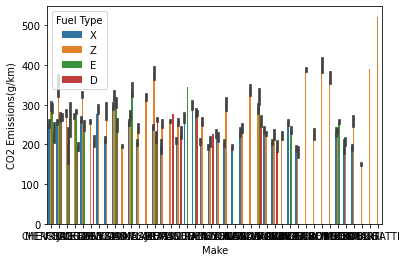

In [12]:
data.Make.value_counts()
sns.barplot(data=data,x='Make',y='CO2 Emissions(g/km)',hue='Fuel Type')
plt.show()

### Question: What is the relation between Fuel type and co2 emission(g/km)?

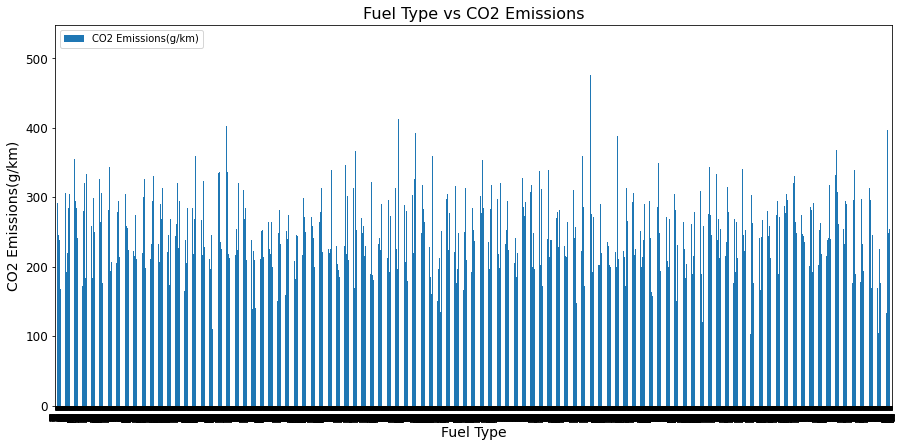

In [13]:
data.plot(kind='bar',x='Fuel Type',y='CO2 Emissions(g/km)',figsize=[15,7])
plt.xlabel(xlabel ='Fuel Type', size = 14)
plt.ylabel(ylabel='CO2 Emissions(g/km)',size=14)
_=plt.xticks(size=12)
_=plt.yticks(size=12)
plt.title(label='Fuel Type vs CO2 Emissions', size=16)
plt.show()

### Question: What is the distribution in fuel type and Cylinder?

<AxesSubplot:xlabel='Fuel Type,Cylinders'>

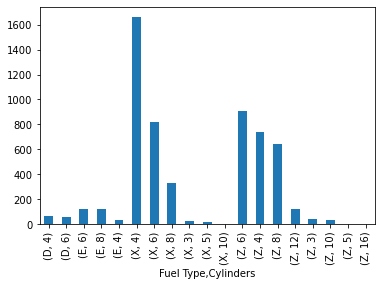

In [14]:
data.groupby(['Fuel Type'])['Cylinders'].value_counts().plot(kind='bar')

**Observation:**

- There are maximum number of K fuel type and and 4 stroke cylinder and second number z fuel type and 6 cylinder available in marker.

### Question: What is the distribution of Cylinder ?

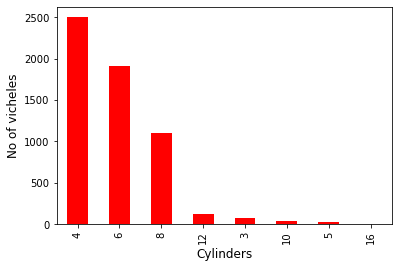

In [15]:
data['Cylinders'].value_counts().plot(kind='bar',color='red')
plt.xlabel(xlabel='Cylinders',size=12)
plt.ylabel(ylabel='No of vicheles', size=12)
plt.show()

### Observation:
- There are maximum 4 no of cylinder and after that 6 no's of cylinders available in the market

### Which  fuel type of maximum vehicles availabe in road?

<AxesSubplot:>

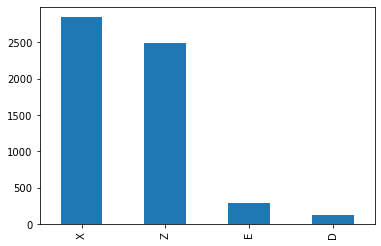

In [16]:
data['Fuel Type'].value_counts().plot(kind='bar')

<AxesSubplot:xlabel='Fuel Type'>

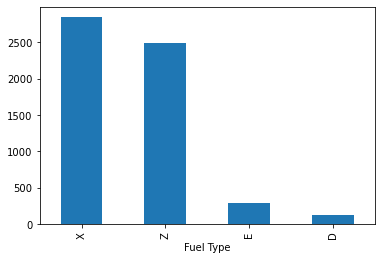

In [17]:
data.groupby(['Fuel Type'])['CO2 Emissions(g/km)'].count().sort_values(ascending=False).plot(kind='bar')

### Top 10 car available on road 

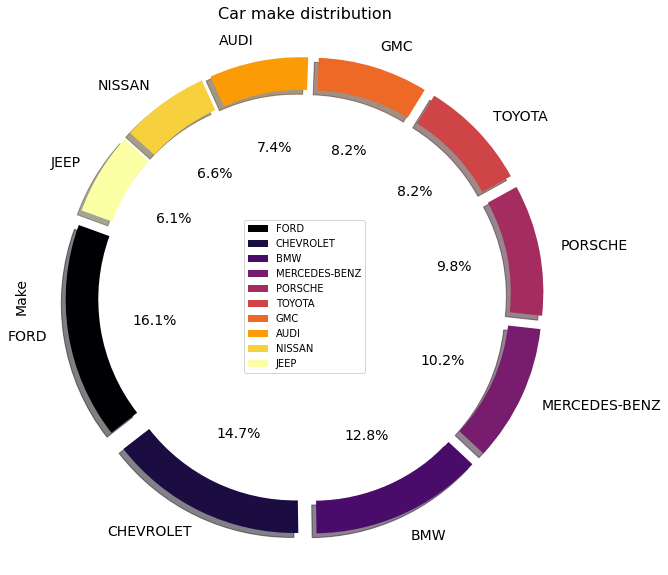

In [18]:
figure = plt.figure(figsize=[10, 10])
space = np.ones(10)/10
data.Make.value_counts()[:10].plot(kind='pie',fontsize = 14, autopct='%3.1f%%', wedgeprops=dict(width=0.15), 
                                       shadow=True, startangle=160, cmap='inferno', legend=True,explode=space)
plt.ylabel(ylabel='Make', size=14)
plt.title(label='Car make distribution', size=16)
plt.show()

### Observation:
-  We can **observe** the **share** of each Category value in the data.

- **Larger strips** on the donut represents a **higher share** of a particular **Make**.
  
- Here **Ford** category have the **highest share** with **16.1%** of samples.

### Type of distribution between Fuel type and Cylinders

Text(0.5, 1.0, 'Fuel Type')

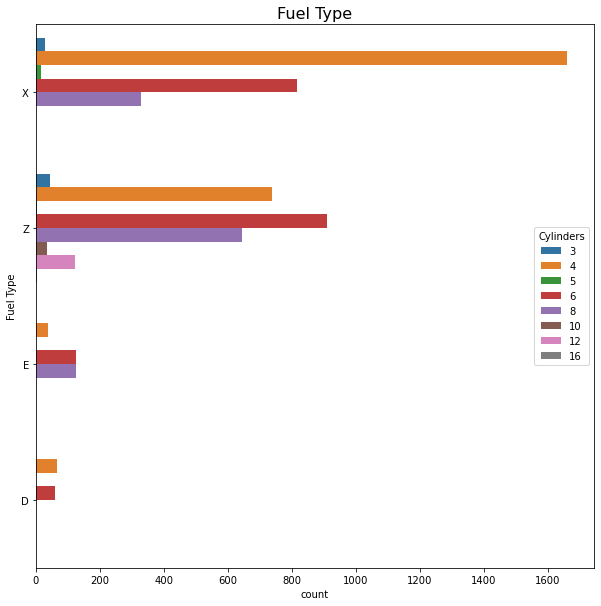

In [19]:
figure = plt.figure(figsize=[10, 10])
sns.countplot(y= 'Fuel Type',data=data,hue='Cylinders')
plt.title('Fuel Type',size =16)

### Fuel consumption  in city

<AxesSubplot:xlabel='Fuel Consumption City (L/100 km)', ylabel='Count'>

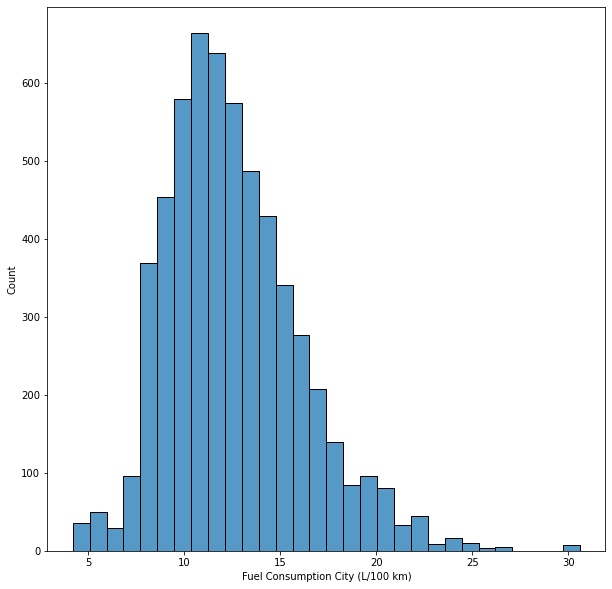

In [20]:
figure = plt.figure(figsize=[10, 10])
sns.histplot(data=data,x='Fuel Consumption City (L/100 km)',bins = 30)

In [21]:
data.columns

Index(['Make', 'Model', 'Vehicle Class', 'Engine Size(L)', 'Cylinders',
       'Transmission', 'Fuel Type', 'Fuel Consumption City (L/100 km)',
       'Fuel Consumption Hwy (L/100 km)', 'Fuel Consumption Comb (L/100 km)',
       'Fuel Consumption Comb (mpg)', 'CO2 Emissions(g/km)'],
      dtype='object')

### Fuel consumption   profile in Hwy

<AxesSubplot:xlabel='Fuel Consumption Hwy (L/100 km)', ylabel='Count'>

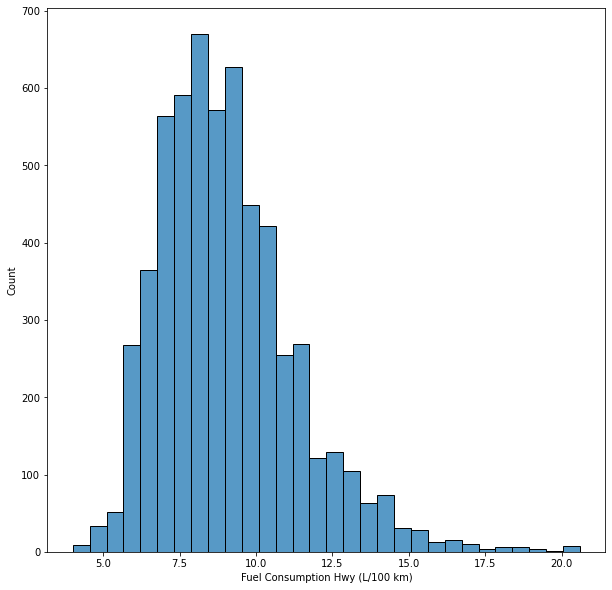

In [22]:
figure = plt.figure(figsize=[10, 10])
sns.histplot(data=data,x='Fuel Consumption Hwy (L/100 km)',bins = 30)

### Cobine Fuel consumption profile

<AxesSubplot:xlabel='Fuel Consumption Comb (L/100 km)', ylabel='Count'>

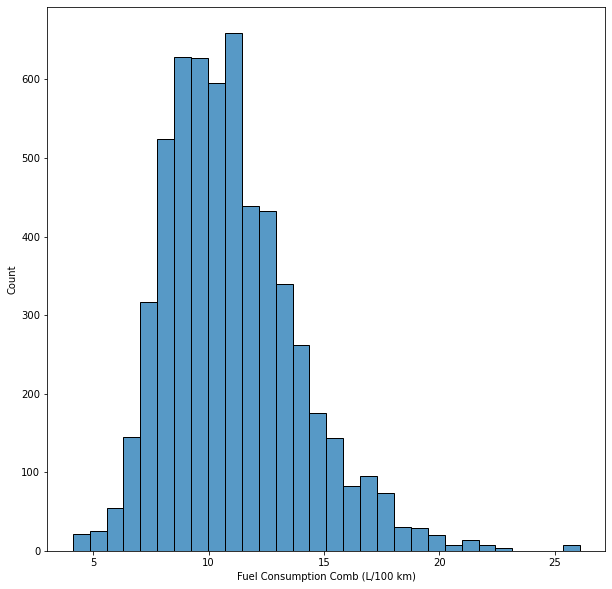

In [23]:
figure = plt.figure(figsize=[10, 10])
sns.histplot(data=data,x='Fuel Consumption Comb (L/100 km)',bins = 30)

### Relation between Engine size and co2 emission

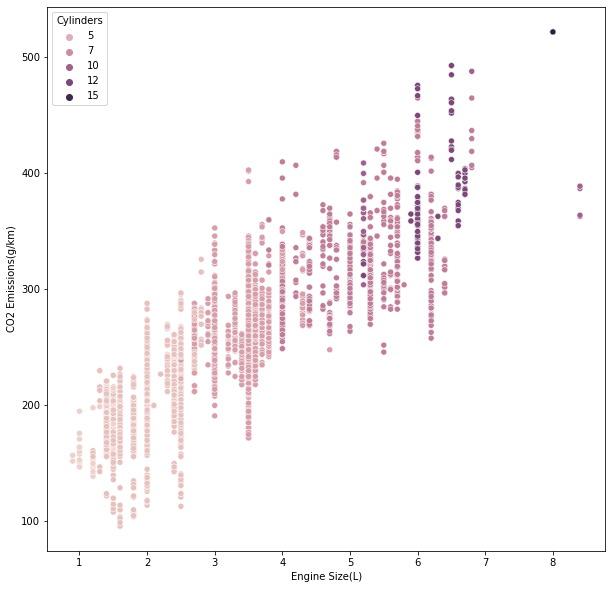

In [24]:
figure = plt.figure(figsize=[10, 10])
sns.scatterplot(x='Engine Size(L)',y = 'CO2 Emissions(g/km)',data=data,hue='Cylinders')
plt.show()

### Observation:-
- As engine size is increase co2 emission is also increase

### Question: What is the correlation between the feature ?

In [25]:
data.corr()

,Engine Size(L),Cylinders,Fuel Consumption City (L/100 km),Fuel Consumption Hwy (L/100 km),Fuel Consumption Comb (L/100 km),Fuel Consumption Comb (mpg),CO2 Emissions(g/km)
Engine Size(L),1.00000,0.92729,0.83191,0.75910,0.81666,-0.75870,0.85142
Cylinders,0.92729,1.00000,0.80223,0.71524,0.78168,-0.72022,0.83384
Fuel Consumption City (L/100 km),0.83191,0.80223,1.00000,0.94806,0.99383,-0.92651,0.92037
Fuel Consumption Hwy (L/100 km),0.75910,0.71524,0.94806,1.00000,0.97718,-0.89118,0.88333
Fuel Consumption Comb (L/100 km),0.81666,0.78168,0.99383,0.97718,1.00000,-0.92549,0.91856
Fuel Consumption Comb (mpg),-0.75870,-0.72022,-0.92651,-0.89118,-0.92549,1.00000,-0.90812
CO2 Emissions(g/km),0.85142,0.83384,0.92037,0.88333,0.91856,-0.90812,1.00000


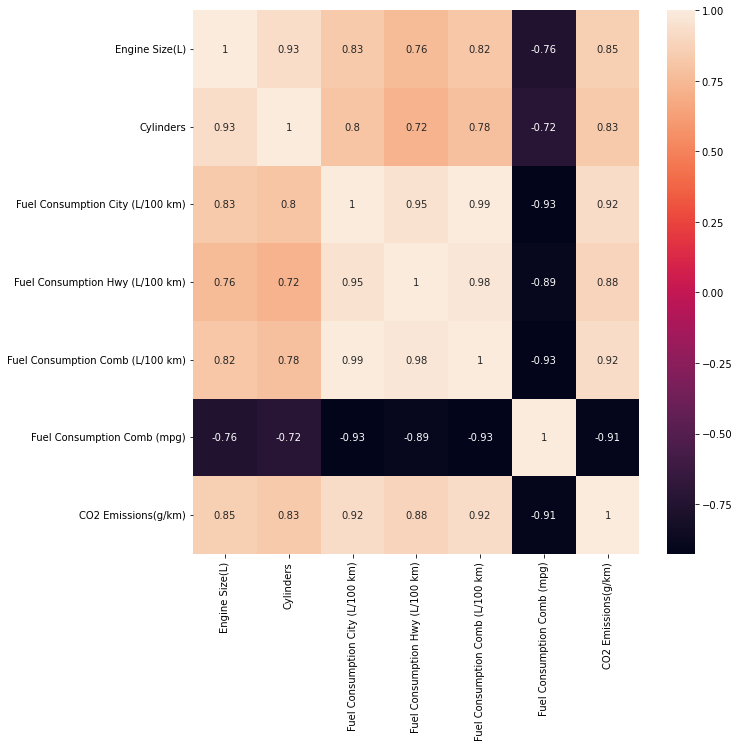

In [26]:
figure = plt.figure(figsize=[10,10])
sns.heatmap(data.corr(),annot=True)
plt.show()

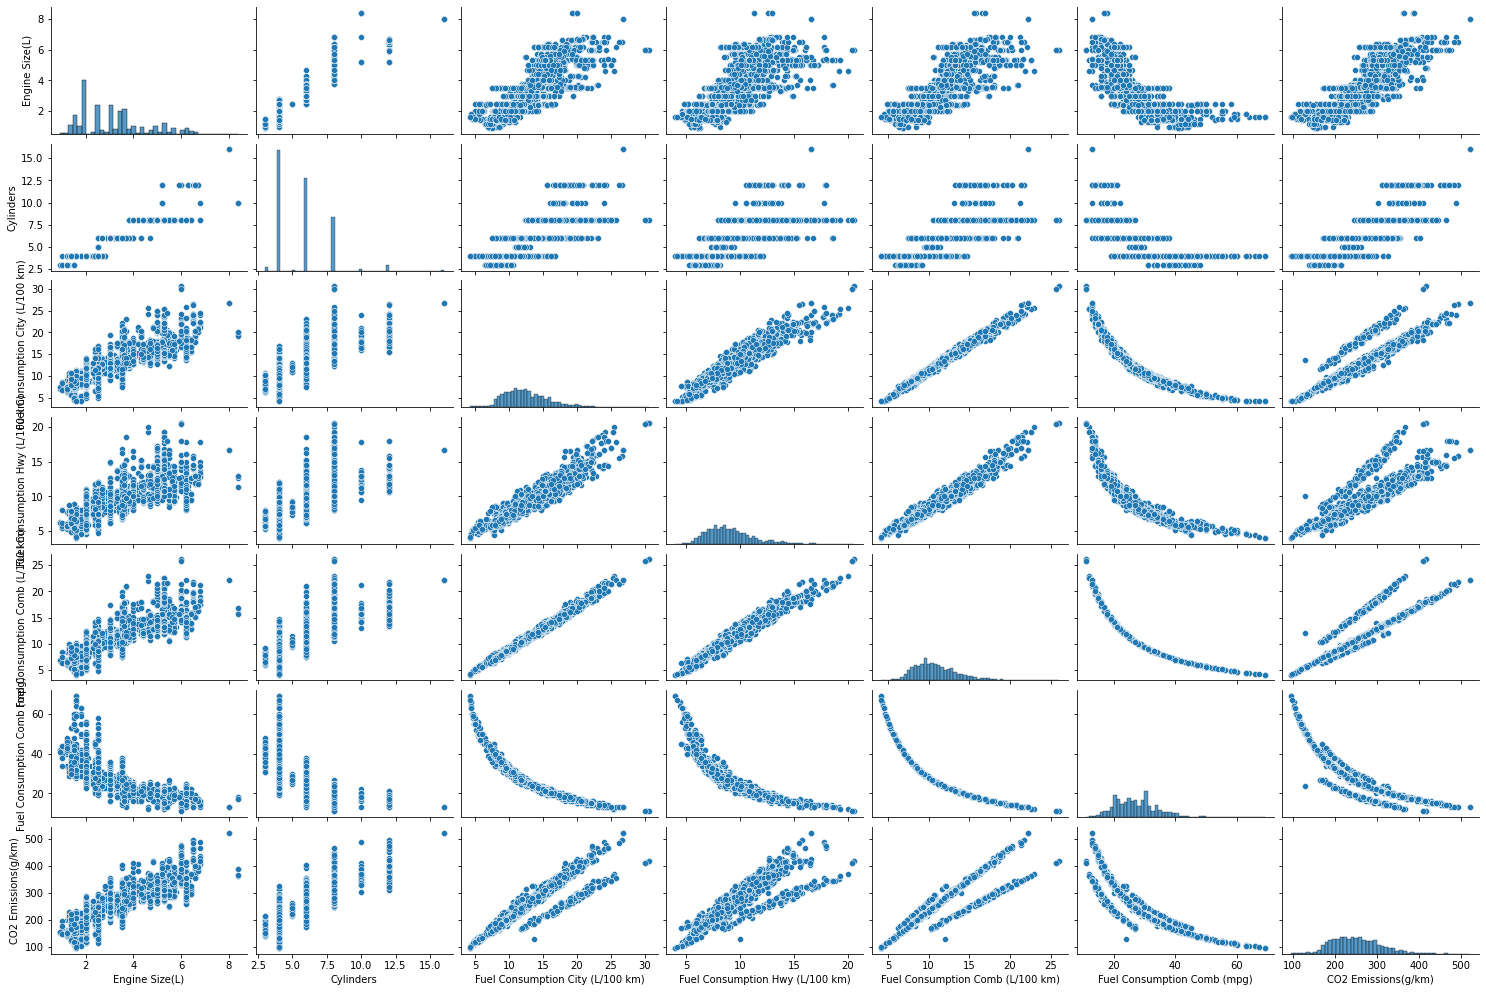

In [27]:
sns.pairplot(data, size = 2, aspect = 1.5)

In [28]:
data.columns

Index(['Make', 'Model', 'Vehicle Class', 'Engine Size(L)', 'Cylinders',
       'Transmission', 'Fuel Type', 'Fuel Consumption City (L/100 km)',
       'Fuel Consumption Hwy (L/100 km)', 'Fuel Consumption Comb (L/100 km)',
       'Fuel Consumption Comb (mpg)', 'CO2 Emissions(g/km)'],
      dtype='object')

In [29]:
data.head()

,Make,Model,Vehicle Class,Engine Size(L),Cylinders,Transmission,Fuel Type,Fuel Consumption City (L/100 km),Fuel Consumption Hwy (L/100 km),Fuel Consumption Comb (L/100 km),Fuel Consumption Comb (mpg),CO2 Emissions(g/km)
0,CHEVROLET,TRAX 4WD,SUV - SMALL,1.40000,4,AS6,X,9.90000,7.80000,8.90000,32,210
1,FORD,MUSTANG,SUBCOMPACT,5.80000,8,M6,Z,15.90000,9.90000,13.20000,21,304
2,MERCEDES-BENZ,E 400 4MATIC,MID-SIZE,3.00000,6,A9,Z,11.80000,8.70000,10.40000,27,246
3,JAGUAR,XFR,MID-SIZE,5.00000,8,AS8,E,21.30000,14.10000,18.10000,16,290
4,DODGE,CHALLENGER SRT HELLCAT,MID-SIZE,6.20000,8,A8,Z,18.00000,10.70000,14.70000,19,338


In [30]:
data.shape

(5760, 12)

In [31]:
data['Fuel Type'].value_counts()

X    2850
Z    2498
E     285
D     127
Name: Fuel Type, dtype: int64

In [32]:
data.drop(['Make','Model','Vehicle Class','Transmission'],axis=1,inplace=True)
data.head()

,Engine Size(L),Cylinders,Fuel Type,Fuel Consumption City (L/100 km),Fuel Consumption Hwy (L/100 km),Fuel Consumption Comb (L/100 km),Fuel Consumption Comb (mpg),CO2 Emissions(g/km)
0,1.40000,4,X,9.90000,7.80000,8.90000,32,210
1,5.80000,8,Z,15.90000,9.90000,13.20000,21,304
2,3.00000,6,Z,11.80000,8.70000,10.40000,27,246
3,5.00000,8,E,21.30000,14.10000,18.10000,16,290
4,6.20000,8,Z,18.00000,10.70000,14.70000,19,338


In [33]:
cat_col = ['Fuel Type']
data_with_dummies = pd.get_dummies(data,columns=cat_col,drop_first=True)

In [34]:
data_with_dummies.head()

,Engine Size(L),Cylinders,Fuel Consumption City (L/100 km),Fuel Consumption Hwy (L/100 km),Fuel Consumption Comb (L/100 km),Fuel Consumption Comb (mpg),CO2 Emissions(g/km),Fuel Type_E,Fuel Type_X,Fuel Type_Z
0,1.40000,4,9.90000,7.80000,8.90000,32,210,0,1,0
1,5.80000,8,15.90000,9.90000,13.20000,21,304,0,0,1
2,3.00000,6,11.80000,8.70000,10.40000,27,246,0,0,1
3,5.00000,8,21.30000,14.10000,18.10000,16,290,1,0,0
4,6.20000,8,18.00000,10.70000,14.70000,19,338,0,0,1


### Training and testing the Model

<a name = Section6></a>

---
# **6. Training and testing the Model**

<a name = Section61></a>
### **6.1 Splitting data into training and test datasets**

In [35]:
data_with_dummies.head()

,Engine Size(L),Cylinders,Fuel Consumption City (L/100 km),Fuel Consumption Hwy (L/100 km),Fuel Consumption Comb (L/100 km),Fuel Consumption Comb (mpg),CO2 Emissions(g/km),Fuel Type_E,Fuel Type_X,Fuel Type_Z
0,1.40000,4,9.90000,7.80000,8.90000,32,210,0,1,0
1,5.80000,8,15.90000,9.90000,13.20000,21,304,0,0,1
2,3.00000,6,11.80000,8.70000,10.40000,27,246,0,0,1
3,5.00000,8,21.30000,14.10000,18.10000,16,290,1,0,0
4,6.20000,8,18.00000,10.70000,14.70000,19,338,0,0,1


In [36]:
data_with_dummies.shape

(5760, 10)

In [37]:
x= data_with_dummies.drop('CO2 Emissions(g/km)',axis=1)
x.head(2)
x.shape

(5760, 9)

In [38]:
y = data_with_dummies['CO2 Emissions(g/km)']
y.head()

0    210
1    304
2    246
3    290
4    338
Name: CO2 Emissions(g/km), dtype: int64

In [39]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.20,random_state=1)

In [40]:
print('x_train shape is :',x_train.shape)
print('y_train shape is: ',y_train.shape)
print('---------------------------------')
print('x_test shape is: ',x_test.shape)
print('y_test shape is: ',y_test.shape)

x_train shape is : (4608, 9)
y_train shape is:  (4608,)
---------------------------------
x_test shape is:  (1152, 9)
y_test shape is:  (1152,)


<a name = Section62></a>
### **6.2 Linear regression in scikit-learn**

In [41]:
from sklearn.linear_model import LinearRegression
linreg = LinearRegression()
linreg.fit(x_train,y_train)

LinearRegression()

In [42]:
y_pred_train = linreg.predict(x_train)

In [43]:
y_pred_test = linreg.predict(x_test)

In [44]:
print(y_pred_test)

[195.81636761 310.3918333  275.86545138 ... 301.32861596 338.01998797
 299.29007455]


<a name = Section63></a>
### **6.3 Interpreting Model Coefficients**

In [45]:
print('intercept:' , linreg.intercept_)
print('Coefficient:' ,linreg.coef_)

intercept: 86.10595810612696
Coefficient: [ 1.31550963e-01  1.29970552e+00  6.39097485e+00  5.62397469e+00
  7.82447754e+00 -9.24395627e-01 -1.37840795e+02 -2.97974610e+01
 -3.04950817e+01]


Text(0, 0.5, 'Predicted Values')

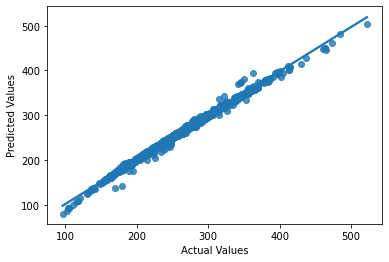

In [46]:
sns.regplot(y_test,y_pred_test)
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')

<a name = Section7></a>

---
# **7. Model Evaluation**

### RMSE CHECK

In [47]:
# Check RMSE 
import numpy as np
from sklearn import metrics
RMSE_train = np.sqrt(metrics.mean_squared_error(y_train,y_pred_train))
RMSE_test = np.sqrt(metrics.mean_squared_error(y_test,y_pred_test))

In [48]:
print('RMSE for training set is {}'.format(RMSE_train))
print('RMSE for test set is {}'.format(RMSE_test))

RMSE for training set is 4.973729555694204
RMSE for test set is 4.75785510789008


### R2 CHECK

In [49]:
R2_train = metrics.r2_score(y_train,y_pred_train)
R2_test = metrics.r2_score(y_test,y_pred_test)

In [50]:
print('R2_score for training set is {}'.format(R2_train))
print('R2_score for test set is {}'.format(R2_test))

R2_score for training set is 0.9927369164935436
R2_score for test set is 0.9936021528271404


### Observation:-
- RMSE for train data is 4.97 and RMSE for test data is 4.75.
- R2 score for train data is 0.9927 and R2 score for test data is 0.9936.

<a name = Section8></a>

---
# **8. Prediction on test data set**
- As of now we check  RMSE and R2 score of our train data now we will predict on test data set

In [136]:
test_data = pd.read_csv('D:/Co2-Emission/test_data.csv')
test_data.head(2)

,Make,Model,Vehicle Class,Engine Size(L),Cylinders,Transmission,Fuel Type,Fuel Consumption City (L/100 km),Fuel Consumption Hwy (L/100 km),Fuel Consumption Comb (L/100 km),Fuel Consumption Comb (mpg)
0,PORSCHE,Panamera 4 Executive,FULL-SIZE,3.00000,6,AM8,Z,12.40000,9.00000,10.90000,26
1,BMW,M6 CABRIOLET,SUBCOMPACT,4.40000,8,AM7,Z,17.30000,11.60000,14.70000,19


In [137]:
test_data['Index'] = test_data.index

In [138]:
test_data.head(2)

,Make,Model,Vehicle Class,Engine Size(L),Cylinders,Transmission,Fuel Type,Fuel Consumption City (L/100 km),Fuel Consumption Hwy (L/100 km),Fuel Consumption Comb (L/100 km),Fuel Consumption Comb (mpg),Index
0,PORSCHE,Panamera 4 Executive,FULL-SIZE,3.00000,6,AM8,Z,12.40000,9.00000,10.90000,26,0
1,BMW,M6 CABRIOLET,SUBCOMPACT,4.40000,8,AM7,Z,17.30000,11.60000,14.70000,19,1


In [139]:
test_data.shape

(1625, 12)

In [140]:
test_data_N = test_data.drop('Index',axis=1)

In [142]:
test_data_N.head(2)

,Make,Model,Vehicle Class,Engine Size(L),Cylinders,Transmission,Fuel Type,Fuel Consumption City (L/100 km),Fuel Consumption Hwy (L/100 km),Fuel Consumption Comb (L/100 km),Fuel Consumption Comb (mpg)
0,PORSCHE,Panamera 4 Executive,FULL-SIZE,3.00000,6,AM8,Z,12.40000,9.00000,10.90000,26
1,BMW,M6 CABRIOLET,SUBCOMPACT,4.40000,8,AM7,Z,17.30000,11.60000,14.70000,19


In [143]:
#test_data.drop(test_data['Fuel Type==N'],inplace=True)

In [143]:
test_data_N['Fuel Type'].value_counts()

X    788
Z    704
E     85
D     48
Name: Fuel Type, dtype: int64

**we drop categorical columns in our data set**

In [144]:
test_data_N.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1625 entries, 0 to 1624
Data columns (total 11 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   Make                              1625 non-null   object 
 1   Model                             1625 non-null   object 
 2   Vehicle Class                     1625 non-null   object 
 3   Engine Size(L)                    1625 non-null   float64
 4   Cylinders                         1625 non-null   int64  
 5   Transmission                      1625 non-null   object 
 6   Fuel Type                         1625 non-null   object 
 7   Fuel Consumption City (L/100 km)  1625 non-null   float64
 8   Fuel Consumption Hwy (L/100 km)   1625 non-null   float64
 9   Fuel Consumption Comb (L/100 km)  1625 non-null   float64
 10  Fuel Consumption Comb (mpg)       1625 non-null   int64  
dtypes: float64(4), int64(2), object(5)
memory usage: 139.8+ KB


In [145]:
test_data_N.columns

Index(['Make', 'Model', 'Vehicle Class', 'Engine Size(L)', 'Cylinders',
       'Transmission', 'Fuel Type', 'Fuel Consumption City (L/100 km)',
       'Fuel Consumption Hwy (L/100 km)', 'Fuel Consumption Comb (L/100 km)',
       'Fuel Consumption Comb (mpg)'],
      dtype='object')

In [146]:
test_data_N.head(1)

,Make,Model,Vehicle Class,Engine Size(L),Cylinders,Transmission,Fuel Type,Fuel Consumption City (L/100 km),Fuel Consumption Hwy (L/100 km),Fuel Consumption Comb (L/100 km),Fuel Consumption Comb (mpg)
0,PORSCHE,Panamera 4 Executive,FULL-SIZE,3.00000,6,AM8,Z,12.40000,9.00000,10.90000,26


In [147]:
test_data_N.drop(['Make','Model','Vehicle Class','Transmission'],axis = 1, inplace=True)


In [149]:
test_data_N.head(2)

,Engine Size(L),Cylinders,Fuel Type,Fuel Consumption City (L/100 km),Fuel Consumption Hwy (L/100 km),Fuel Consumption Comb (L/100 km),Fuel Consumption Comb (mpg)
0,3.00000,6,Z,12.40000,9.00000,10.90000,26
1,4.40000,8,Z,17.30000,11.60000,14.70000,19


In [150]:
test_data_N.shape

(1625, 7)

In [87]:
cat_col1 = ['Fuel Type']

In [152]:
test_data_dummies = pd.get_dummies(data=test_data_N,columns=cat_col1,drop_first=True)

In [153]:
test_data_dummies.head()

,Engine Size(L),Cylinders,Fuel Consumption City (L/100 km),Fuel Consumption Hwy (L/100 km),Fuel Consumption Comb (L/100 km),Fuel Consumption Comb (mpg),Fuel Type_E,Fuel Type_X,Fuel Type_Z
0,3.00000,6,12.40000,9.00000,10.90000,26,0,0,1
1,4.40000,8,17.30000,11.60000,14.70000,19,0,0,1
2,6.20000,8,16.10000,11.40000,14.00000,20,0,0,1
3,5.30000,8,14.60000,10.30000,12.70000,22,0,1,0
4,4.00000,6,14.30000,11.90000,13.20000,21,0,1,0


In [154]:
data_with_dummies.head()

,Engine Size(L),Cylinders,Fuel Consumption City (L/100 km),Fuel Consumption Hwy (L/100 km),Fuel Consumption Comb (L/100 km),Fuel Consumption Comb (mpg),CO2 Emissions(g/km),Fuel Type_E,Fuel Type_X,Fuel Type_Z,index
0,1.40000,4,9.90000,7.80000,8.90000,32,210,0,1,0,0
1,5.80000,8,15.90000,9.90000,13.20000,21,304,0,0,1,1
2,3.00000,6,11.80000,8.70000,10.40000,27,246,0,0,1,2
3,5.00000,8,21.30000,14.10000,18.10000,16,290,1,0,0,3
4,6.20000,8,18.00000,10.70000,14.70000,19,338,0,0,1,4


In [156]:
data_with_dummies.shape

(5760, 11)

In [157]:
sub_df = linreg.predict(test_data_dummies)

In [158]:
sub_df.ravel()

array([254.92014166, 339.84561905, 324.88691612, ..., 297.47268697,
       200.88531548, 285.94983664])

In [159]:
submission = pd.DataFrame({'Index': test_data['Index'], 'CO2 Emissions(g/km)': sub_df.ravel()})
submission.to_csv('D:/submission.csv', header=False)
submission.head()

,Index,CO2 Emissions(g/km)
0,0,254.92014
1,1,339.84562
2,2,324.88692
3,3,297.67269
4,4,306.81997


# Thank you..............